In [1]:
%env DDE_BACKEND=tensorflow
import tensorflow as tf
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

env: DDE_BACKEND=tensorflow


Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


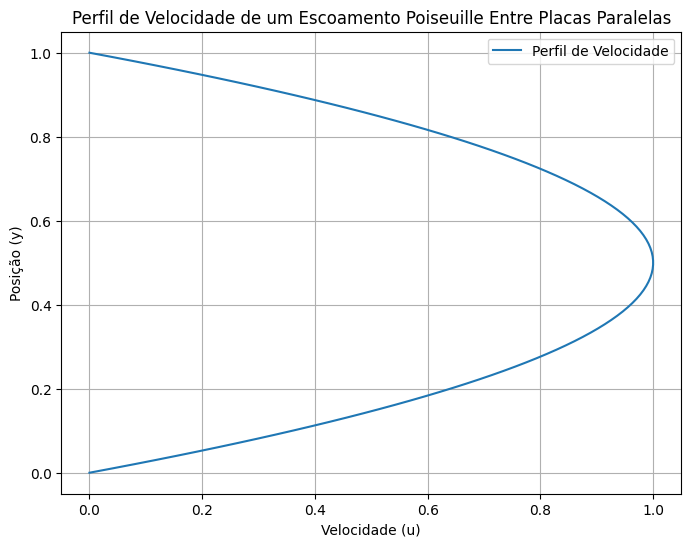

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
rho = 1
mu = 1
u_in = 1
D = 1
L = 2

# O perfil de velocidade é ajustado para que a velocidade máxima no centro seja u_in
def velocity_profile(y, D, u_in):
    # A velocidade no centro é u_in, y = D/2
    # u_in = (1 / (2 * mu)) * dp_dx * ((D/2)**2 - D * (D/2))
    # Simplificando, dp_dx = -8 * mu * u_in / D^2
    dp_dx = -8 * mu * u_in / D**2
    return (1 / (2 * mu)) * dp_dx * (y**2 - D * y)

# Discretização do domínio
y = np.linspace(0, D, 100)

# Calculando o perfil de velocidade
u = velocity_profile(y, D, u_in)

# Plotando o perfil de velocidade
plt.figure(figsize=(8, 6))
plt.plot(u, y, label='Perfil de Velocidade')
plt.xlabel('Velocidade (u)')
plt.ylabel('Posição (y)')
plt.title('Perfil de Velocidade de um Escoamento Poiseuille Entre Placas Paralelas')
plt.legend()
plt.grid(True)
plt.show()


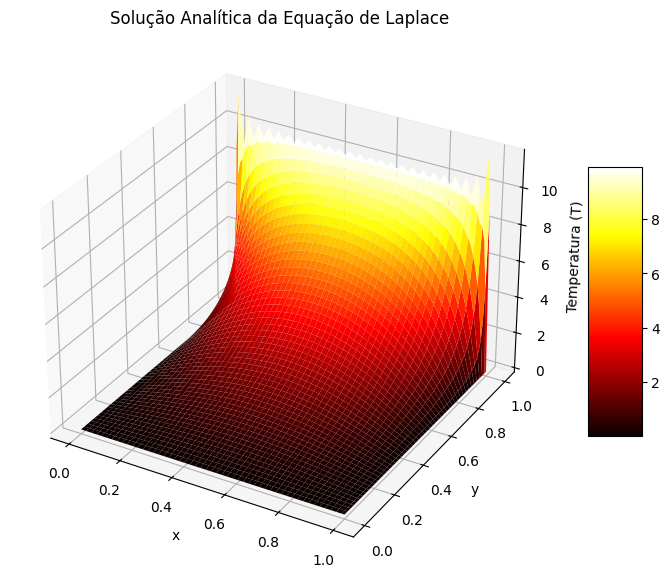

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo a solução analítica da equação de Laplace
def T(x, y, L, k, q, num_terms=50):
    sum_terms = np.zeros_like(x)
    for n in range(1, num_terms + 1):
        # Coeficientes da série de Fourier
        B_n = (2 * k / (n * np.pi * q)) * (1 - (-1)**n)
        sum_terms += B_n * np.sin(n * np.pi * x / L) * np.sinh(n * np.pi * y / L) / np.sinh(n * np.pi)
    return sum_terms

# Parâmetros
L = 1  # Tamanho da placa (L x L)
k = 5  # Razão k
q = 0.5  # Razão q

# Grid de pontos
x = np.linspace(0, L, 100)
y = np.linspace(0, L, 100)
X, Y = np.meshgrid(x, y)

# Calculando a solução analítica
Z = T(X, Y, L, k, q)

# Plotando o resultado em 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='hot', edgecolor='none')

ax.set_title('Solução Analítica da Equação de Laplace')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperatura (T)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()


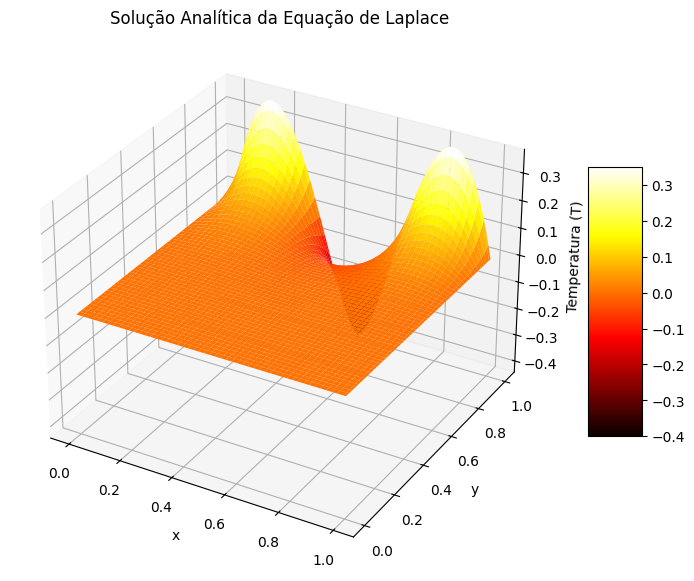

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo a solução analítica da equação de Laplace com uma distribuição parabólica de calor
def T(x, y, L, k, q, num_terms=50):
    sum_terms = np.zeros_like(x)
    for n in range(1, num_terms + 1, 2):  # n ímpares
        B_n = (16 * k / (n**3 * np.pi**3 * q)) * (1 - (-1)**((n-1)/2))  # Coeficientes da série de Fourier ajustados
        sum_terms += B_n * np.sin(n * np.pi * x / L) * np.sinh(n * np.pi * y / L) / np.sinh(n * np.pi)
    return sum_terms

# Parâmetros
L = 1  # Tamanho da placa (L x L)
k = 5  # Razão k
q = 0.5  # Razão q

# Grid de pontos
x = np.linspace(0, L, 100)
y = np.linspace(0, L, 100)
X, Y = np.meshgrid(x, y)

# Calculando a solução analítica
Z = T(X, Y, L, k, q)

# Plotando o resultado em 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='hot', edgecolor='none')

ax.set_title('Solução Analítica da Equação de Laplace')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperatura (T)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()


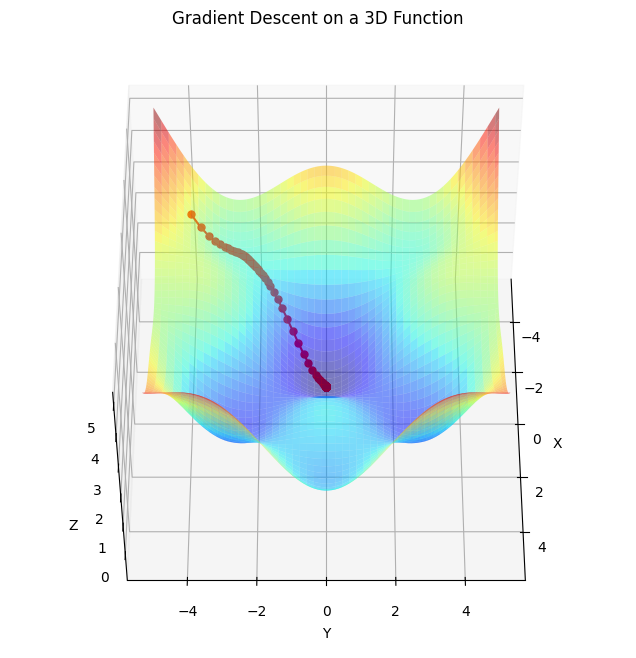

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Função objetivo com um mínimo local e um mínimo global
def func(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * (x**2 + y**2)

# Gradiente da função
def gradient(x, y):
    df_dx = np.cos(x) * np.cos(y) + 0.2 * x
    df_dy = -np.sin(x) * np.sin(y) + 0.2 * y
    return np.array([df_dx, df_dy])

# Parâmetros para o gráfico
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = func(x, y)

# Configuração inicial para o gradiente descendente
start = np.array([-4, -4])
learning_rate = 0.2
n_iterations = 100
points = [start]

# Executar o gradiente descendente
for i in range(n_iterations):
    grad = gradient(*points[-1])
    next_point = points[-1] - learning_rate * grad
    points.append(next_point)

points = np.array(points)

# Plotar a função e a trajetória do gradiente
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='jet', alpha=0.5)
ax.plot(points[:, 0], points[:, 1], func(points[:, 0], points[:, 1]), color='red', marker='o', linestyle='-', markersize=5, markerfacecolor='red', markeredgecolor='red')

# Trajetória do gradiente descendente
# Trajetória do gradiente descendente com pontos mais visíveis (opacos)

ax.set_title('Gradient Descent on a 3D Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


ax.view_init(elev=50
             , azim=0)
plt.show()


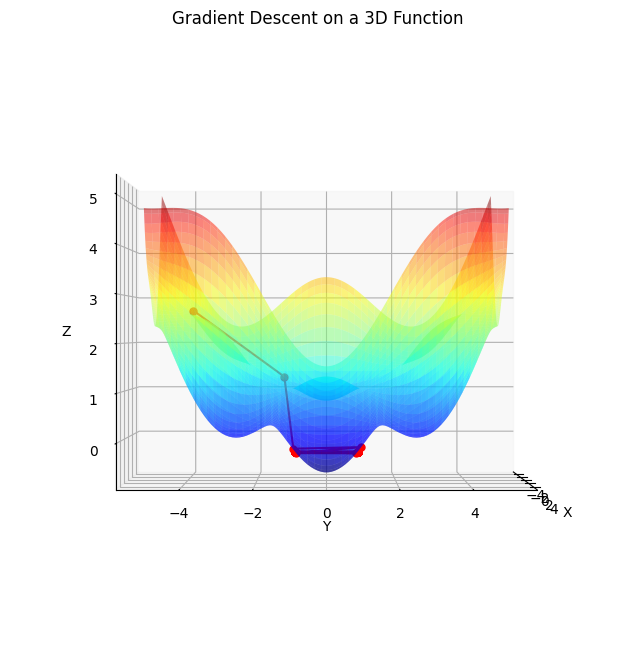

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Função objetivo com um mínimo local e um mínimo global
def func(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * (x**2 + y**2)

# Gradiente da função
def gradient(x, y):
    df_dx = np.cos(x) * np.cos(y) + 0.2 * x
    df_dy = -np.sin(x) * np.sin(y) + 0.2 * y
    return np.array([df_dx, df_dy])

# Parâmetros para o gráfico
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = func(x, y)

# Configuração inicial para o gradiente descendente
start = np.array([-4, -4])
learning_rate = 2
n_iterations = 10000
points = [start]

# Executar o gradiente descendente
for i in range(n_iterations):
    grad = gradient(*points[-1])
    next_point = points[-1] - learning_rate * grad
    points.append(next_point)

points = np.array(points)

# Plotar a função e a trajetória do gradiente
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='jet', alpha=0.5)
ax.plot(points[:, 0], points[:, 1], func(points[:, 0], points[:, 1]), color='red', marker='o', linestyle='-', markersize=5, markerfacecolor='red', markeredgecolor='red')

# Trajetória do gradiente descendente
# Trajetória do gradiente descendente com pontos mais visíveis (opacos)

ax.set_title('Gradient Descent on a 3D Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


ax.view_init(elev=0, azim=0)
plt.show()

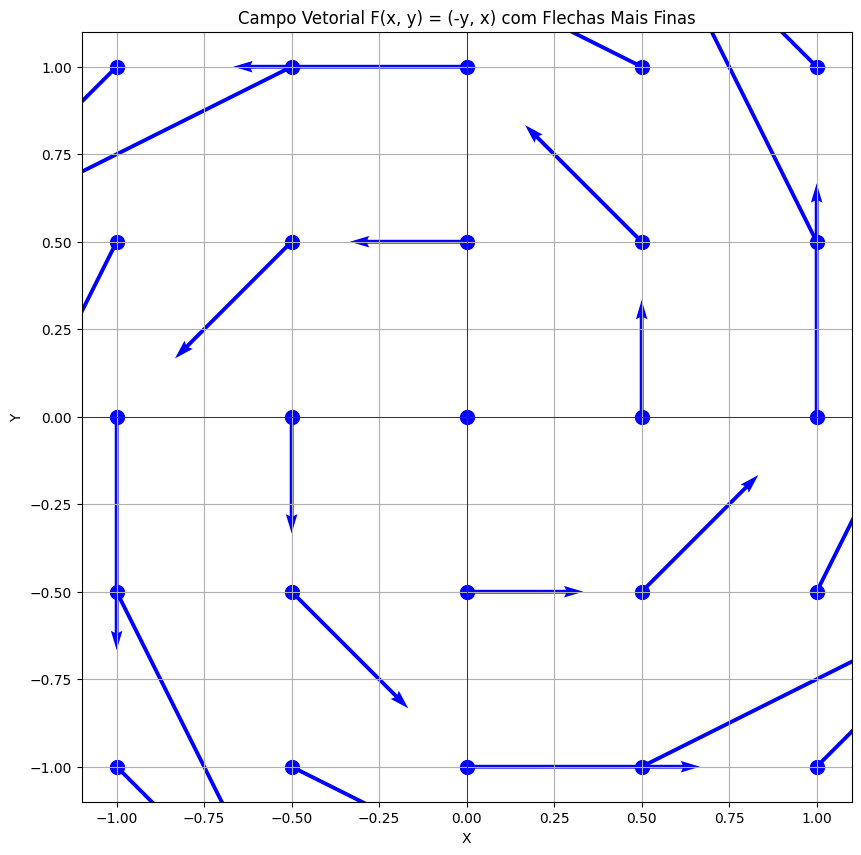

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a região quadrada com 20 pontos
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)
X, Y = np.meshgrid(x, y)

# Definindo a função vetorial sobre os pontos
# Vamos usar um exemplo simples de campo vetorial: F(x, y) = (-y, x)
U = -Y
V = X

plt.figure(figsize=(10, 10))
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1.5, color='b', width=0.005)
plt.scatter(X, Y, color='b', s= 100)
plt.title("Campo Vetorial F(x, y) = (-y, x) com Flechas Mais Finas")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


In [22]:
rho = 1
mu = 1
u_in = 1.5
D = 2
L = 10
tle = 10
v_i = 0
tau_0 = 10

# Papasnastasiou approximation
m = 10

In [17]:
geom = dde.geometry.Rectangle(xmin=[-L/2,-D/2],xmax=[L/2,D/2])

In [18]:
def upper_wall(X, on_boundary):
  # on_upper_wall = np.logical_and(np.isclose(X[1],D/2,rtol=1e-05,atol=1e-08), np.not_equal(X[0],-L/2), on_boundary)
  on_upper_wall = np.logical_and(np.logical_and(np.isclose(X[1],D/2,rtol=1e-05,atol=1e-08), np.not_equal(X[0],-L/2)), on_boundary)
  return on_upper_wall

def lower_wall(X, on_boundary):
  # on_lower_wall = np.logical_and(np.isclose(X[1],-D/2,rtol=1e-05,atol=1e-08), np.not_equal(X[0],-L/2),on_boundary)
  on_lower_wall = np.logical_and(np.logical_and(np.isclose(X[1],-D/2,rtol=1e-05,atol=1e-08), np.not_equal(X[0],-L/2)),on_boundary)
  return on_lower_wall

def boundary_inlet(X,on_boundary):
  on_inlet = np.logical_and(np.isclose(X[0],-L/2,rtol=1e-05,atol=1e-08),on_boundary)
  return on_inlet

def boundary_outlet(X,on_boundary):
  on_outlet = np.logical_and(np.isclose(X[0],L/2,rtol=1e-05,atol=1e-08),on_boundary)
  return on_outlet

In [19]:
bc_wall_u = dde.DirichletBC(geom, lambda X:v_i, upper_wall, component =0)
bc_wall_u = dde.DirichletBC(geom, lambda X:0., lower_wall, component =0)
bc_wall_v = dde.DirichletBC(geom, lambda X:0., upper_wall, component =1)
bc_wall_v = dde.DirichletBC(geom, lambda X:0., lower_wall, component =1)

bc_inlet_u = dde.DirichletBC(geom, lambda X:u_in, boundary_inlet, component =0)
bc_inlet_v = dde.DirichletBC(geom, lambda X:0., boundary_inlet, component =1)

bc_outlet_p = dde.DirichletBC(geom, lambda X:0., boundary_outlet, component =2)
bc_outlet_v = dde.DirichletBC(geom, lambda X:0., boundary_outlet, component =1)

In [20]:
def pde(X, Y):
    du_x = dde.grad.jacobian(Y, X, i=0, j=0)
    du_y = dde.grad.jacobian(Y, X, i=0, j=1)
    dv_x = dde.grad.jacobian(Y, X, i=1, j=0)
    dv_y = dde.grad.jacobian(Y, X, i=1, j=1)
    dp_x = dde.grad.jacobian(Y, X, i=2, j=0)
    dp_y = dde.grad.jacobian(Y, X, i=2, j=1)
    # du_xx = dde.grad.hessian(Y, X, component=0, i=0, j=0)
    # du_yy = dde.grad.hessian(Y, X, component=0, i=1, j=1)
    # dv_xx = dde.grad.hessian(Y, X, component=1, i=0, j=0)
    # dv_yy = dde.grad.hessian(Y, X, component=1, i=1, j=1)

    # Definições para Bingham para componentes do tensor de tensão
    tau_xy = tau_0 * (1 - tf.exp(- m * (du_y + dv_x))) + mu * (du_y + dv_x)
    tau_yx = tau_0 * (1 - tf.exp(- m * (dv_x + du_y))) + mu * (dv_x + du_y)
    tau_xx = tau_0 * (1 - tf.exp(- m * (du_x + du_x))) + mu * (du_x + du_x)
    tau_yy = tau_0 * (1 - tf.exp(- m * (dv_y + du_y))) + mu * (dv_y + du_y)
    # tau_xy = tau_0 * (1 - np.exp(- m * (du_y + dv_x))) + mu * (du_y + dv_x)
    # tau_yx = tau_0 * (1 - np.exp(- m * (dv_x + du_y))) + mu * (dv_x + du_y)
    # tau_xx = tau_0 * (1 - np.exp(- m * (du_x + du_x))) + mu * (du_x + du_x)
    # tau_yy = tau_0 * (1 - np.exp(- m * (dv_y + du_y))) + mu * (dv_y + du_y)

    # tau_diff = tau_xy - tau_0
    # H_tau = tf.where(tau_diff > 0, 1.0, 0.0)
    # dv_x = dde.grad.jacobian(Y, X, i=0, j=0) * H_tau
    # du_y = dde.grad.jacobian(Y, X, i=0, j=1) * H_tau
    
    # tau_xy = tau_0 + mu * (du_y + dv_x)
    # tau_yx = tau_0 + mu * (dv_x + du_y)
    # tau_xx = tau_0 + mu * (du_x + du_x)
    # tau_yy = tau_0 + mu * (dv_y + du_y)

    # Derivadas dos tensores de tensão
    dtau_xy_y = dde.grad.jacobian(tau_xy, X, i=0, j=1)
    dtau_yx_x = dde.grad.jacobian(tau_yx, X, i=0, j=0)
    dtau_xx_x = dde.grad.jacobian(tau_xx, X, i=0, j=0)
    dtau_yy_y = dde.grad.jacobian(tau_yy, X, i=0, j=1)

    # Equações de Navier-Stokes modificadas para incluir todos os tensores de tensão
    pde_u = rho * (Y[:,0:1] * du_x + Y[:,1:2] * du_y) + dp_x - dtau_yx_x - dtau_xx_x
    pde_v = rho * (Y[:,0:1] * dv_x + Y[:,1:2] * dv_y) + dp_y - dtau_xy_y - dtau_yy_y
    pde_cont = du_x + dv_y  # Equação de continuidade

    return [pde_u, pde_v, pde_cont]


In [21]:
data = dde.data.PDE(geom,
                    pde,
                    [bc_wall_u,bc_wall_v,bc_inlet_u,bc_inlet_v,bc_outlet_p,bc_outlet_v],
                    num_domain = 10000,
                    num_boundary = 10000,
                    num_test = 20000)

<function matplotlib.pyplot.show(close=None, block=None)>

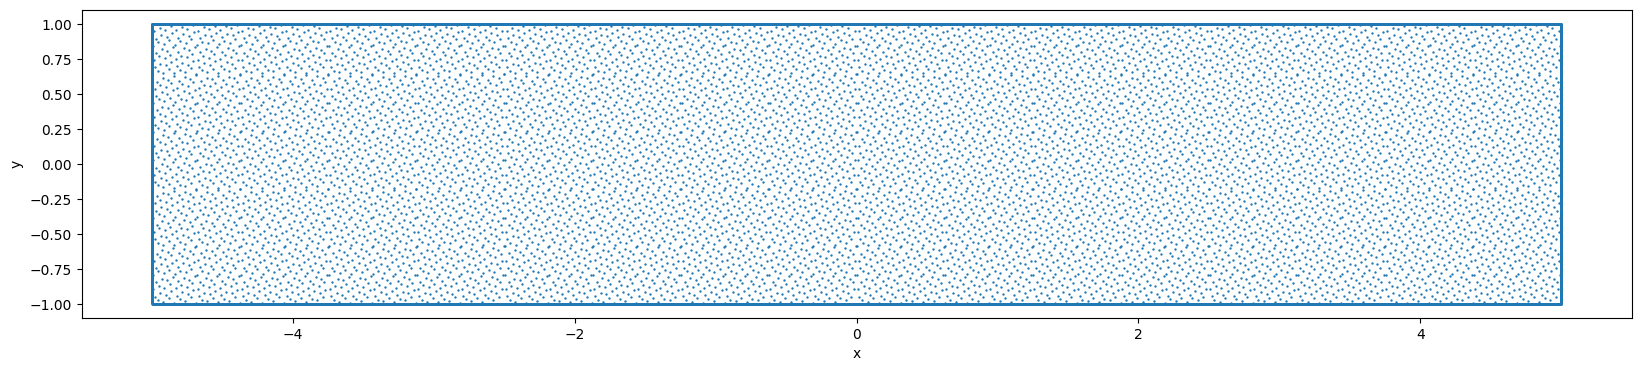

In [22]:
plt.figure(figsize=(20,4))
plt.scatter(data.train_x_all[:,0],data.train_x_all[:,1],s=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show

In [23]:
net = dde.maps.FNN([2]+[84]*6+[3], "sigmoid","Glorot uniform")

In [24]:
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

Compiling model...
'compile' took 0.000924 s



In [25]:
losshistory,train_state = model.train(epochs = 10000, display_every=100)

Training model...



c:\Users\Matuchaki\AppData\Local\pypoetry\Cache\virtualenvs\deepxde-custom-E_cFIhQu-py3.10\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Cause: could not parse the source code of <function <lambda> at 0x00000243CC8F2EF0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x00000243CC8F2EF0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x00000243CC8F3400>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x00000243CC

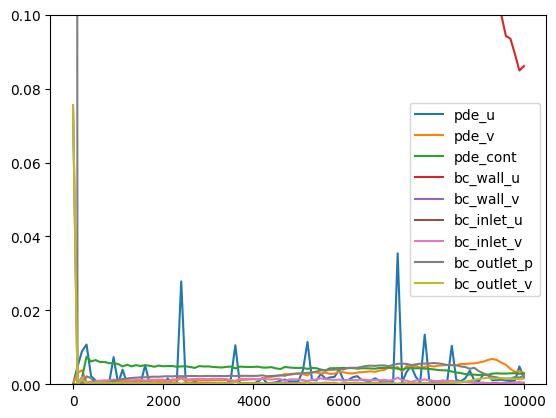

In [26]:
import matplotlib.pyplot as plt

plot_array = np.array(losshistory.loss_test)
plot_labels = ["pde_u", "pde_v", "pde_cont", "bc_wall_u", "bc_wall_v", "bc_inlet_u", "bc_inlet_v", "bc_outlet_p", "bc_outlet_v"]
# plot_array = np.array(losshistory.loss_train)
for i in range(plot_array.shape[1]):
    plt.plot(losshistory.steps, plot_array[:,i], label=plot_labels[i])
    
plt.legend()
plt.ylim([0, 0.1])
plt.show()

In [27]:
dde.optimizers.config.set_LBFGS_options(maxiter = 1000)
model.compile("L-BFGS")
losshistory,train_state = model.train()
dde.saveplot(losshistory, train_state, issave = False , isplot = False)

Compiling model...
'compile' took 20.013662 s

Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
10000     [1.64e-03, 3.20e-03, 3.28e-03, 8.61e-02, 2.55e-04, 1.18e-01, 4.89e-04, 2.33e-03, 1.55e-03]    [1.81e-03, 3.06e-03, 2.90e-03, 8.61e-02, 2.55e-04, 1.18e-01, 4.89e-04, 2.33e-03, 1.55e-03]    []  
11000     [3.44e-03, 8.27e-03, 3.90e-03, 2.11e-02, 4.41e-04, 8.17e-02, 1.84e-03, 3.58e-04, 1.06e-03]    [3.97e-03, 9.22e-03, 4.29e-03, 2.11e-02, 4.41e-04, 8.17e-02, 1.84e-03, 3.58e-04, 1.06e-03]    []  

Best model at step 11000:
  train loss: 1.22e-01
  test loss: 1.24e-01
  test metric: []

'train' took 12938.648837 s



In [28]:
samples= geom.random_points(500000)
result = model.predict(samples)

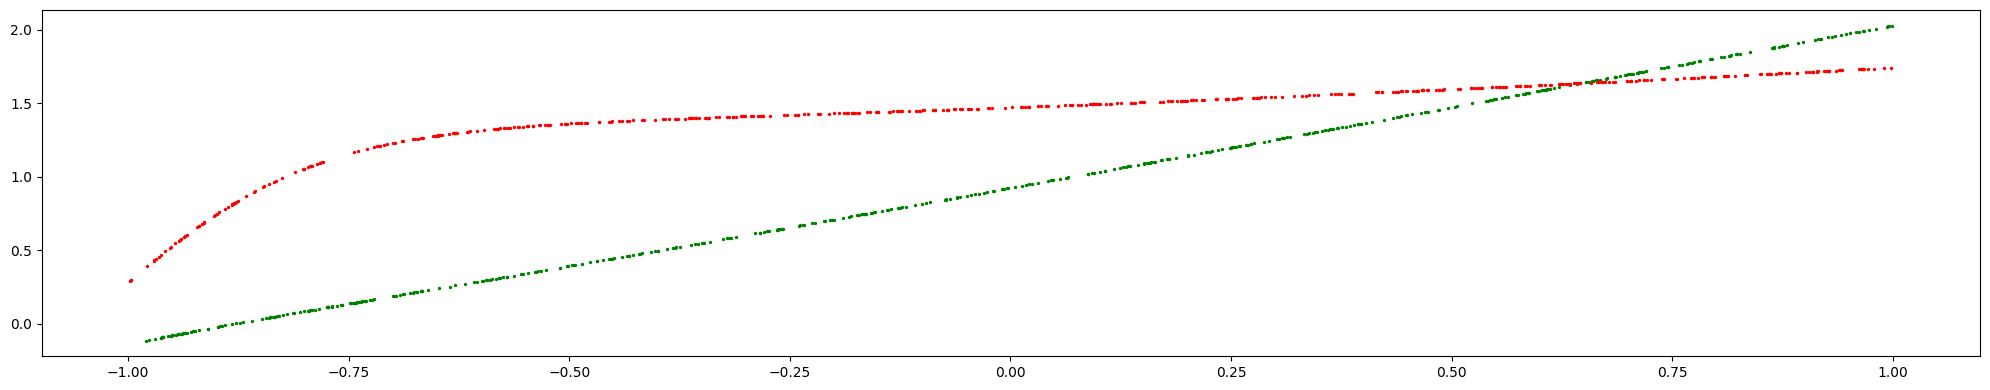

In [29]:
color_legend=[[0,1.5],[-0.3,0.3],[0,35]]
# for idx in range(3):
plt.figure(figsize=(20,4))
mask = np.where((samples[:,0] > 4.9) & (samples[:,0] < 4.91))
plt.scatter(samples[mask,1], result[mask,0], c='green',s=2)
mask = np.where((samples[:,0] < -4.9) & (samples[:,0] > -4.91))
plt.scatter(samples[mask,1], result[mask,0], c='red',s=2)
plt.tight_layout()
plt.show()

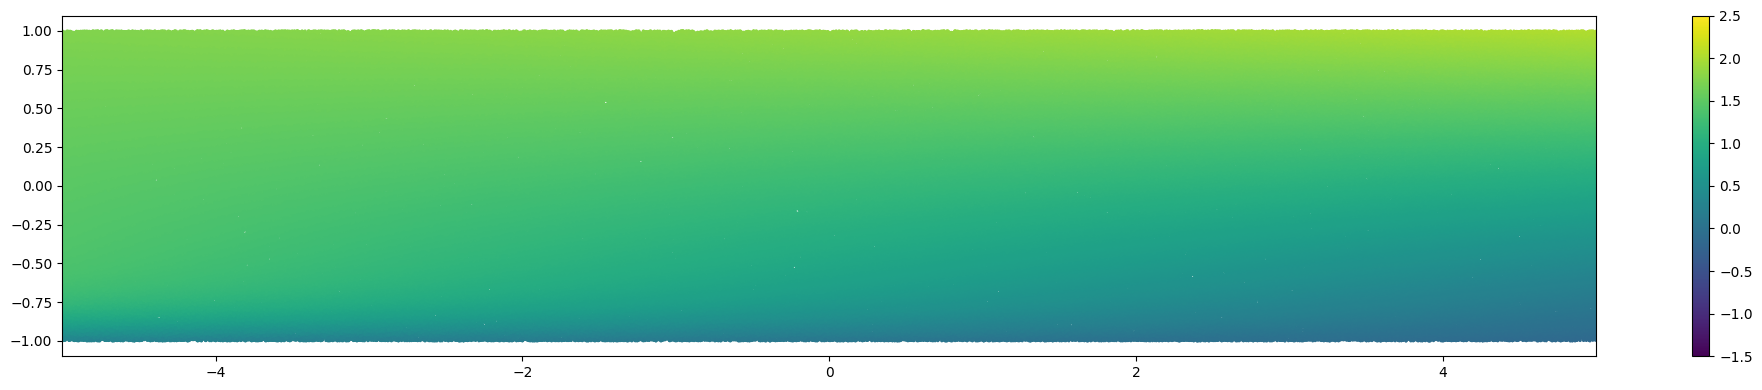

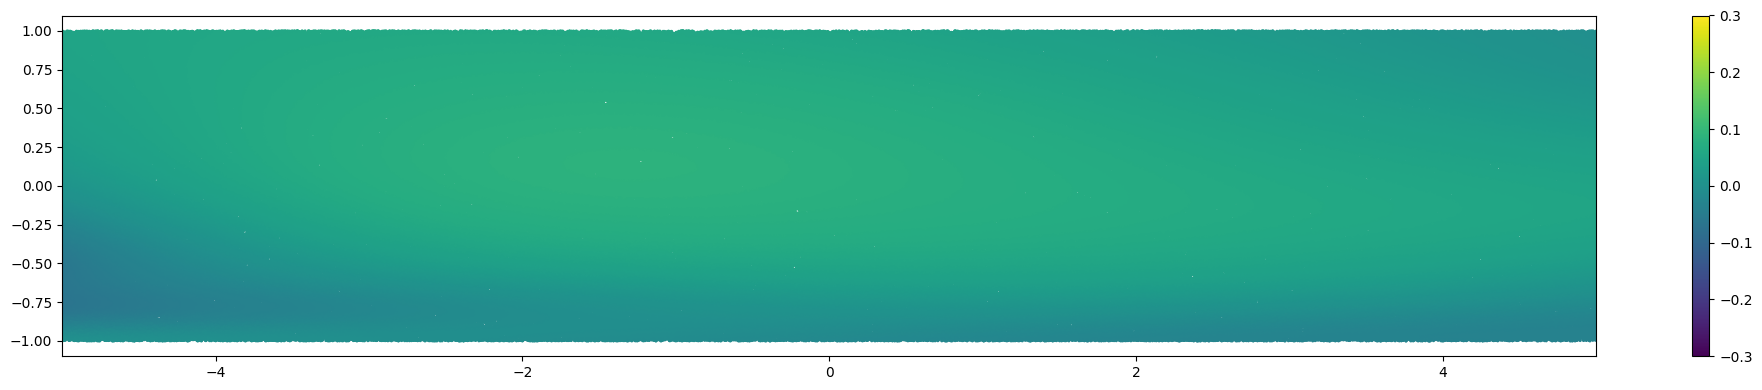

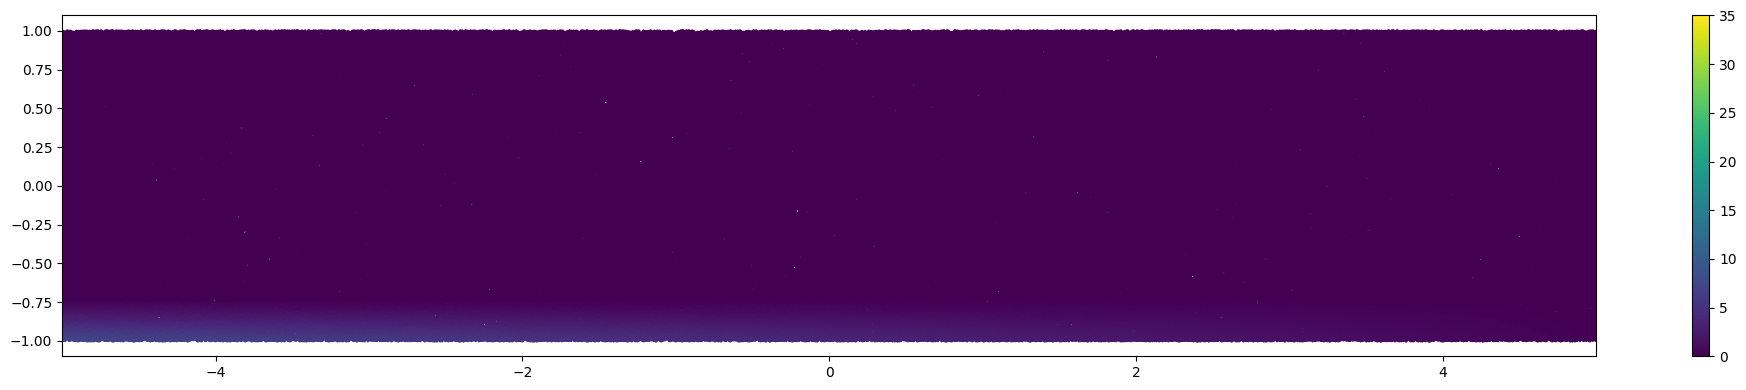

In [30]:
color_legend=[[-1.5,2.5],[-0.3,0.3],[0,35]]
for idx in range(3):
  plt.figure(figsize=(20,4))
  plt.scatter(samples[:,0], samples[:,1], c=result[:,idx], cmap='viridis',s=2)
  plt.colorbar()
  plt.clim(color_legend[idx])
  plt.xlim((0-D/2,D-D/2))
  plt.xlim((0-L/2,L-L/2))
  plt.tight_layout()
  plt.show()